# Stock Market Prediction And Forecasting Using Stacked LSTM
**By: `Suraj Honkamble`**
### Beginner Level Task-2

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Load and read the data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


### Data understanding

In [3]:
df.shape

(2035, 8)

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


### Statistical Information

In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


1. **Average stockprice of TATAGlobal is 149 Rupees**
2. **Maximum Stockprice is 325 Rupees and Minimum Stockprice is 80 Rupees.**
3. **Maximum Trade Quantity is 29M and Minimum Trade Quantity is 2.33M.**
4. **Maximum Turnover is 55,755 Lakhs, and minimum Turnover is 37 lakhs.**

### Sort the Date by Ascending

In [7]:
df=df.sort_values(by='Date', ignore_index=True)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


### Exploratory Data Analaysis

In [8]:
df.Date.dtype

dtype('O')

#### Convert Date columns data type fron Object to Datetime format

In [9]:
df['Date']=pd.to_datetime(df['Date'])
print(df.Date.dtype)

datetime64[ns]


#### How many Days Stock Data we have?

In [10]:
print("Starting Date:", df.Date.min())
print("Last Date:", df.Date.max())
print("Number of Days:", (df.Date.max()-df.Date.min()))

Starting Date: 2010-07-21 00:00:00
Last Date: 2018-09-28 00:00:00
Number of Days: 2991 days 00:00:00


#### For 2991 Days of Stock Data we have, Including saturday and sunday.

### TATAGlobal Stock Price Analaysis

In [11]:
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"],
                                        high=df["High"],
                                        low=df["Low"],
                                        close=df["Close"])])
figure.update_layout(title = "TATAGlobal Stock Price Analysis",
                     xaxis_rangeslider_visible=False)
figure.show()

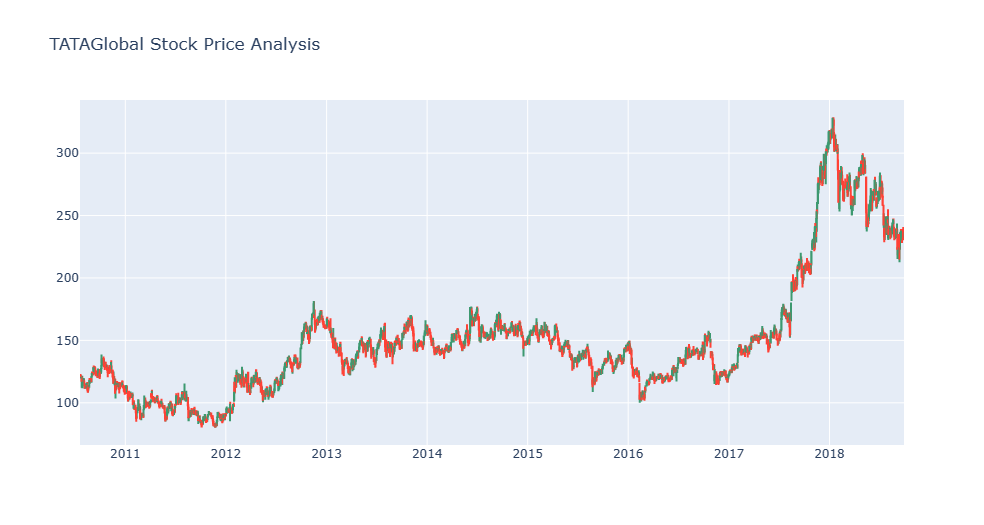

1. **From 2011 to 2017 Stock Price of TATAGlobal is almost constant.**
2. **From start of the 2017 the Stock price increased rapidly.**
3. **TATAGlobal stock price is high in Start of 2018.**
3. **After the Start of 2018 the stock price decreasing.**

### Stock Analysis by Perticular period

In [12]:
figure = px.line(df, x='Date', y='Close', 
                 title='Stock Market Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

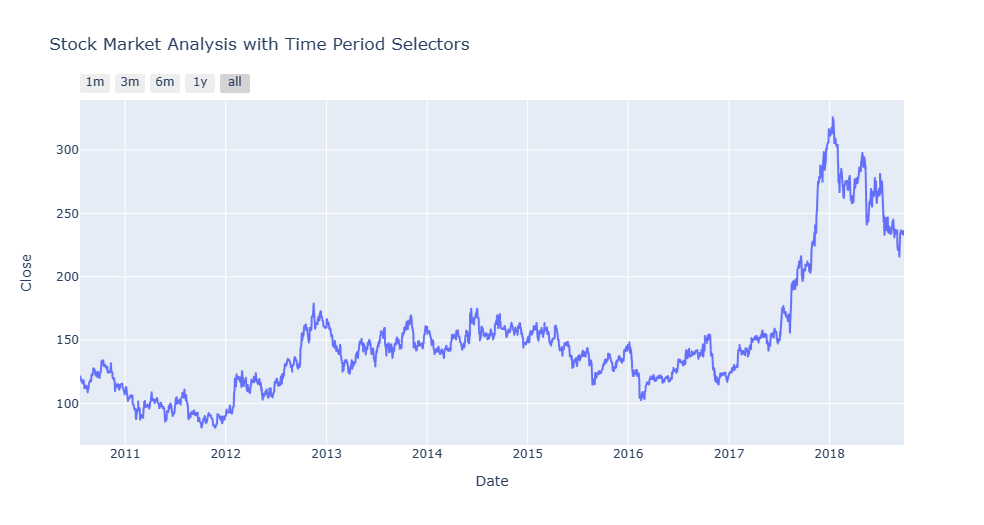

### For Further Analysis we have to choose any one column between `Open, Close, High, Low`, Here i am selecting `Close` column and `Data` column.

In [13]:
data=df[['Date','Close']]
data.head()

,Date,Close
0,2010-07-21,121.55
1,2010-07-22,120.90
2,2010-07-23,120.65
3,2010-07-26,117.60
4,2010-07-27,118.65


## Time Series Forescasting
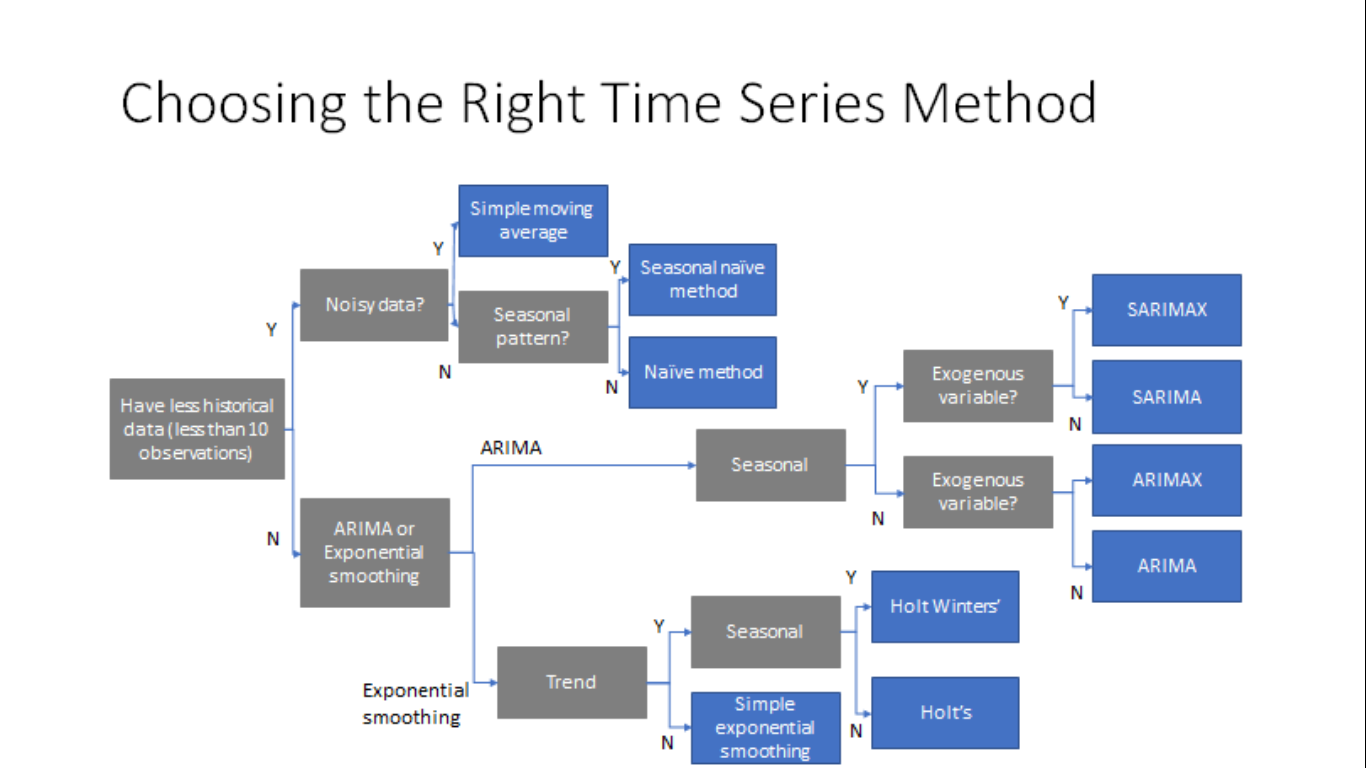

### **Stock Price contains trend and seasonality, so we are going to use Holt winters method, ARIMA & SARIMA.**

### To Run Time series method we have to set Date to Index

In [14]:
data.set_index('Date', inplace=True)
time_series=data[['Close']]
time_series.head()

,Close
Date,
2010-07-21,121.55
2010-07-22,120.90
2010-07-23,120.65
2010-07-26,117.60
2010-07-27,118.65


### As we know that the stock prices depends on recent historical data and current situations so Lets choose only 1 year of historical data.

In [15]:
ts=time_series[-365:]

### Split data into training and testing set

In [16]:
len(ts)

365

**Lets Select 335 Data Points as training and Rest are testing set.**

In [17]:
train=ts[:335]
test=ts[335:]
print("Training Data Points:", len(train), "Testing DataPoints:", len(test))

Training Data Points: 335 Testing DataPoints: 30


## 1. Holt's Winters Additive Method

In [18]:
warnings.filterwarnings('ignore')

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model=ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add')
model=model.fit(optimized=True)
forecast=model.forecast(len(test))
forecast.index=test.index
forecast[20:]

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Date
2018-09-14    240.660245
2018-09-17    240.705638
2018-09-18    241.176974
2018-09-19    240.626574
2018-09-21    240.659910
2018-09-24    242.959396
2018-09-25    242.919759
2018-09-26    242.999552
2018-09-27    243.955824
2018-09-28    243.762561
dtype: float64

### Plot Train Test and Forecasted values

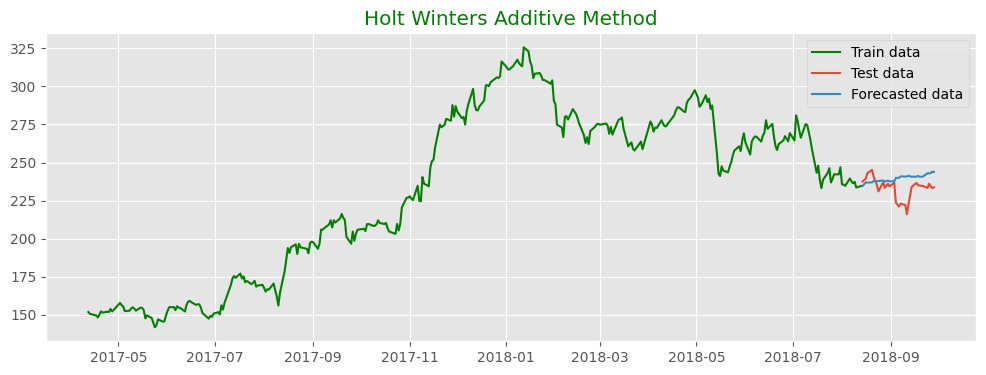

In [20]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train data', color='green')
plt.plot(test, label='Test data')
plt.plot(forecast, label='Forecasted data')
plt.legend()
plt.title('Holt Winters Additive Method', color='green');

### Evaluating the Model

In [21]:
from sklearn.metrics import mean_squared_error as mse,  mean_absolute_percentage_error as mape, r2_score

rmse=np.sqrt(mse(test,forecast)).round(2)
mpe=mape(test, forecast).round(2)*100
result=pd.DataFrame({'Method':'Holt Winters Add Method', 'RMSE':[rmse], 'MAPE':[mpe]})
result

,Method,RMSE,MAPE
0,Holt Winters Add Method,10.63,4.0


#### R2 Score is Negative so not best method to forecast for stock price.

## 2. Holts Winters Multiplicative method

In [22]:
model=ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='mul')
model=model.fit(optimized=True)
forecast=model.forecast(len(test))
forecast.index=test.index
forecast[20:]

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Date
2018-09-14    240.293369
2018-09-17    240.442550
2018-09-18    240.921400
2018-09-19    240.565586
2018-09-21    240.521387
2018-09-24    242.598670
2018-09-25    242.438205
2018-09-26    242.515871
2018-09-27    243.717210
2018-09-28    243.555304
dtype: float64

### Plot train, test adn forecasted values

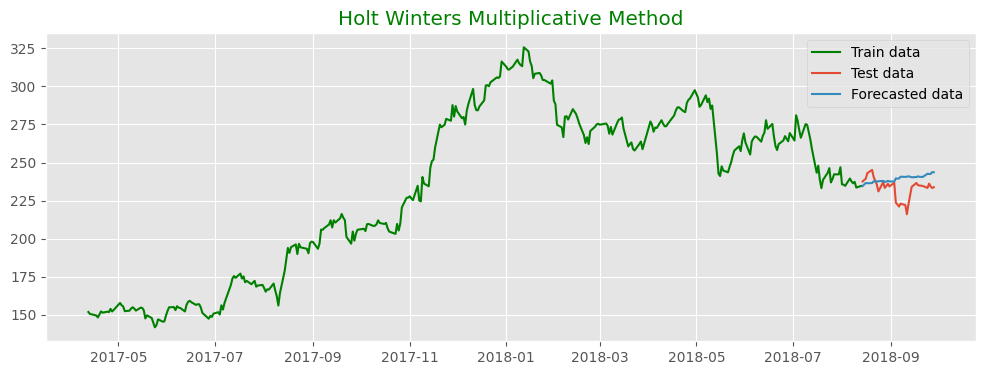

In [23]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train data', color='green')
plt.plot(test, label='Test data')
plt.plot(forecast, label='Forecasted data')
plt.legend()
plt.title('Holt Winters Multiplicative Method', color='green');

### Evaluation of model

In [24]:
rmse=np.sqrt(mse(test,forecast)).round(2)
mpe=mape(test, forecast).round(2)*100
mul_result=pd.DataFrame({'Method':'Holt Winters Mul Method', 'RMSE':[rmse], 'MAPE':[mpe]})
result=pd.concat([result,mul_result])
result

,Method,RMSE,MAPE
0,Holt Winters Add Method,10.63,4.0
0,Holt Winters Mul Method,10.45,4.0


#### RMSE, MAPE are lower than Additive method.

## 3. ARIMA

### Check Trend and Seasonality

<Figure size 640x480 with 0 Axes>

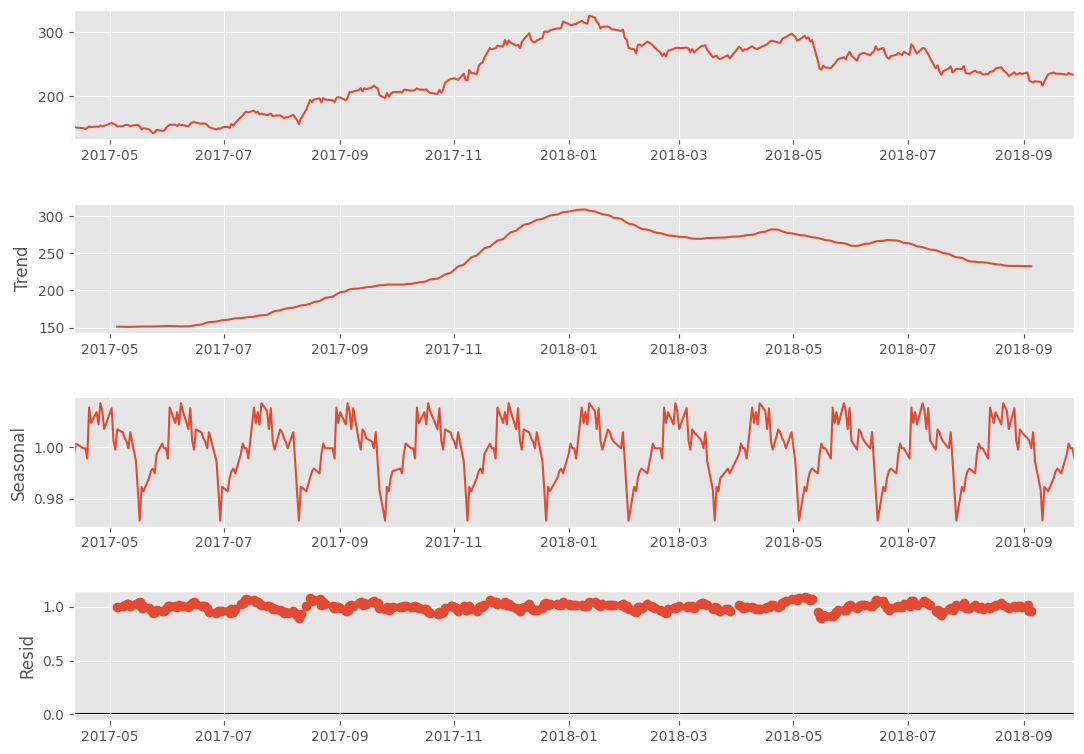

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts, 
                            model='multiplicative', period=30)
fig = plt.figure()  
fig = decompose.plot()  
fig.set_size_inches(12, 8)

#### Time Series contains Seasonality of 3 Months.

### ACF & PACF to see the p,q,d values

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

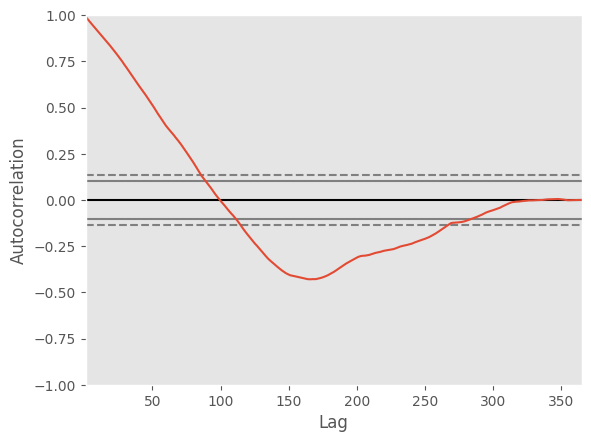

In [26]:
pd.plotting.autocorrelation_plot(ts)

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

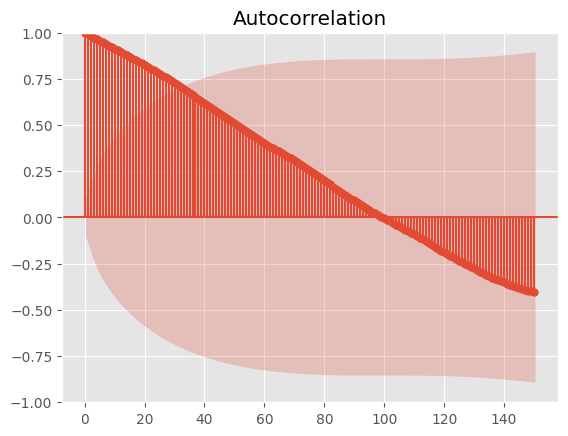

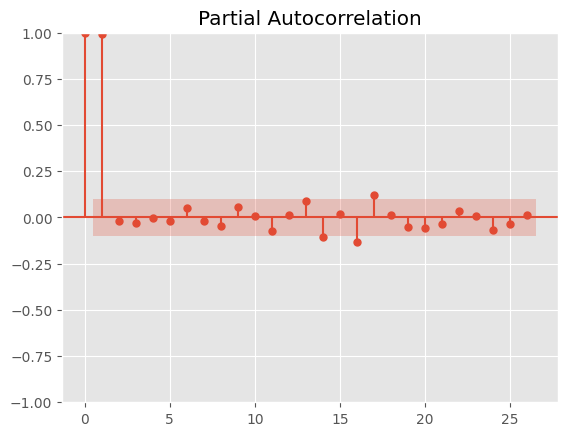

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts, lags=150), plot_pacf(ts)

In [28]:
import statsmodels.api as sm

model=sm.tsa.arima.ARIMA(train, order=(1,1,1))
model=model.fit()
forecast=model.forecast(len(test))
forecast.index=test.index
forecast[20:]

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Date
2018-09-14    234.547948
2018-09-17    234.547948
2018-09-18    234.547948
2018-09-19    234.547948
2018-09-21    234.547948
2018-09-24    234.547948
2018-09-25    234.547948
2018-09-26    234.547948
2018-09-27    234.547948
2018-09-28    234.547948
Name: predicted_mean, dtype: float64

In [29]:
rmse=np.sqrt(mse(test, forecast)).round(2)
rmse

7.11

#### RMSE is lower than above two methods, lets select best for value of `p,d,q` to lower than RMSE.

In [30]:
warnings.filterwarnings('ignore')

import itertools
p=range(0,8)
q=range(0,8)
d=range(0,2)
pdq=list(itertools.product(p,d,q))
len(pdq)

128

In [31]:
rmse=[]
order1=[]
for pdq in pdq:
    try:
        model=sm.tsa.arima.ARIMA(train, order=pdq).fit()
        pred=model.predict(start=len(train), end=len(ts)-1)
        error=np.sqrt(mse(pred,test))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [32]:
order=pd.DataFrame(data=rmse, index=order1, columns=['RMSE'])
order.head()

,RMSE
"(0, 0, 0)",6.862106
"(0, 0, 1)",7.185782
"(0, 0, 2)",7.009667
"(0, 0, 3)",6.590090
"(0, 0, 4)",6.229216


In [33]:
pd.pivot_table(order, values='RMSE', index=order.index, aggfunc=min).sort_values(by='RMSE', ascending=True)[:5].round(2)

,RMSE
"(0, 0, 4)",6.23
"(5, 1, 5)",6.59
"(0, 0, 3)",6.59
"(5, 1, 7)",6.59
"(5, 0, 0)",6.60


**Using p=0, d=0, q=4 train the ARIMA model.**

In [34]:
arima=sm.tsa.arima.ARIMA(train, order=(0,0,4))
arima_fit=arima.fit()
forecast=arima_fit.forecast(len(test))
forecast.index=test.index
forecast

Date
2018-08-14    238.053840
2018-08-16    236.540616
2018-08-17    235.440570
2018-08-20    238.267026
2018-08-21    232.119193
2018-08-23    232.119193
2018-08-24    232.119193
2018-08-27    232.119193
2018-08-28    232.119193
2018-08-29    232.119193
2018-08-30    232.119193
2018-08-31    232.119193
2018-09-03    232.119193
2018-09-04    232.119193
2018-09-05    232.119193
2018-09-06    232.119193
2018-09-07    232.119193
2018-09-10    232.119193
2018-09-11    232.119193
2018-09-12    232.119193
2018-09-14    232.119193
2018-09-17    232.119193
2018-09-18    232.119193
2018-09-19    232.119193
2018-09-21    232.119193
2018-09-24    232.119193
2018-09-25    232.119193
2018-09-26    232.119193
2018-09-27    232.119193
2018-09-28    232.119193
Name: predicted_mean, dtype: float64

### Plot train, test and forecasted values

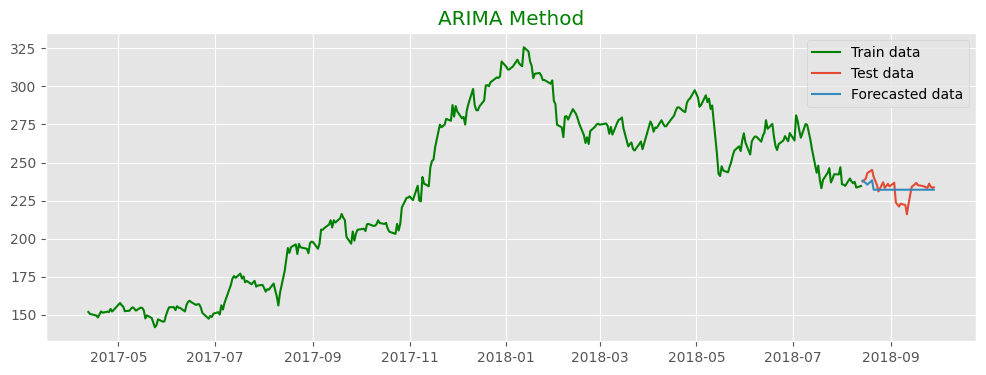

In [35]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train data', color='green')
plt.plot(test, label='Test data')
plt.plot(forecast, label='Forecasted data')
plt.legend()
plt.title('ARIMA Method', color='green');

### Evaluation of model

In [36]:
rmse=np.sqrt(mse(test,forecast)).round(2)
mpe=mape(test, forecast).round(2)*100
arima_result=pd.DataFrame({'Method':'ARIMA', 'RMSE':[rmse], 'MAPE':[mpe]})
result=pd.concat([result,arima_result])
result

,Method,RMSE,MAPE
0,Holt Winters Add Method,10.63,4.0
0,Holt Winters Mul Method,10.45,4.0
0,ARIMA,6.23,2.0


#### RMSE and MAPE are lower than both Holt winters additive and multiplicative methods.

## 4. SARIMA

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model=model.fit()
forecast=model.forecast(len(test))
forecast.index=test.index
forecast[20:]

Date
2018-09-14    241.074045
2018-09-17    241.126329
2018-09-18    241.589226
2018-09-19    241.046205
2018-09-21    241.067256
2018-09-24    243.363166
2018-09-25    243.312657
2018-09-26    243.411024
2018-09-27    244.371137
2018-09-28    244.171996
Name: predicted_mean, dtype: float64

### Plot train, test and forecasted values

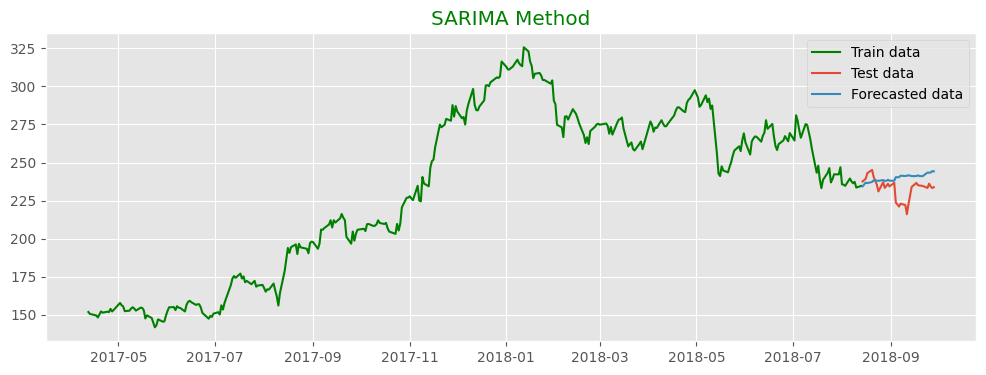

In [38]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train data', color='green')
plt.plot(test, label='Test data')
plt.plot(forecast, label='Forecasted data')
plt.legend()
plt.title('SARIMA Method', color='green');

### Evaluation of model

In [39]:
rmse=np.sqrt(mse(test,forecast)).round(2)
mpe=mape(test, forecast).round(2)*100
sarima_result=pd.DataFrame({'Method':'SARIMA', 'RMSE':[rmse], 'MAPE':[mpe]})
result=pd.concat([result,sarima_result])
result

,Method,RMSE,MAPE
0,Holt Winters Add Method,10.63,4.0
0,Holt Winters Mul Method,10.45,4.0
0,ARIMA,6.23,2.0
0,SARIMA,10.92,4.0


### ARIMA is the best algorithm to forecast the TATAGlobal's stocks price

# Forecast TATAGlobal's stock price using Stacked LSTM.

In [40]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

### Preparing the data
- The LSTM model will need data input in the form of X Vs y. Where the X will represent the last N day’s(15) prices and y will represent the N+1th day (16th-day) price.
- Since LSTM is a Neural network-based algorithm, standardizing or normalizing the data is mandatory for a fast and more accurate fit.

In [41]:
ts.head()

,Close
Date,
2017-04-12,151.75
2017-04-13,150.50
2017-04-17,149.45
2017-04-18,148.15
2017-04-19,150.20


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler=scaler.fit(ts)
ts=scaler.transform(ts)
ts[:5]

array([[0.05460473],
       [0.04781309],
       [0.04210812],
       [0.03504482],
       [0.0461831 ]])

### Preparing Data for LSTM
### Split into Samples X and Y(Input X output Y)

In [43]:
x=[]
y=[]
no_of_rows=len(ts)

# next day's Price Prediction is based on last how many past day's prices
time_step=15

# iterate through values to create combination
for i in range(time_step, no_of_rows, 1):
    x0=ts[i-time_step:i]
    y0=ts[i]
    x.append(x0)
    y.append(y0)

# reshape the input to a 3D (no_of_sample, time_step, features)
x_data=np.array(x)
x_data=x_data.reshape(x_data.shape[0], x_data.shape[1], 1)
print("x data shape :", x_data.shape)

# reshape the output to 2D as it is supposed to single column
y_data=np.array(y)
y_data=y_data.reshape(y_data.shape[0],1)
print("y data shape: ", y_data.shape)

x data shape : (350, 15, 1)
y data shape:  (350, 1)


### Split the data into train and test
- Keeping last few days of data to test abd the learnings of the model and rest for training the model.
- Here I am choosing Last 30 days as testing

In [44]:
# choose number of testing data rows
test_rows=30

# split data into train & test
x_train=x_data[: - test_rows]
x_test=x_data[- test_rows:]
y_train=y_data[: - test_rows]
y_test=y_data[- test_rows:]
print("x train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y test shape: ", y_test.shape)

x train shape:  (320, 15, 1)
y_train shape:  (320, 1)
x_test shape:  (30, 15, 1)
y test shape:  (30, 1)


### Creating the Deep Learning LSTM model
- Use the LSTM function instead of Dense to define the hidden
layers.
- The output layer has one neuron as we are predicting the next day price.

In [45]:
# Defining Input shapes for LSTM
time_step=x_train.shape[1]
tot_feature=x_train.shape[2]
print("Number of TimeSteps:", time_step)
print("Number of Features:", tot_feature)

Number of TimeSteps: 15
Number of Features: 1


In [46]:
# Initialising the RNN
model = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer.
model.add(LSTM(units = 10, activation = 'relu', input_shape = (time_step, tot_feature), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
model.add(LSTM(units = 5, activation = 'relu', input_shape = (time_step, tot_feature), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
model.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
model.add(Dense(units = 1))
 
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
import time
# Measuring the time taken by the model to train
start_time=time.time()
 
# Fitting the RNN to the Training set
model.fit(x_train, y_train, batch_size = 10, epochs = 100)
 
end_time=time.time()
print("Total Time Taken: ", round((end_time-start_time)/60), 'Minutes')

Epoch 1/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0010
Epoch 2/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0010
Epoch 3/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0012
Epoch 4/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0010
Epoch 5/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0010
Epoch 6/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0010
Epoch 7/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0010
Epoch 8/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0010
Epoch 9/100
32/32 [==============================] - 1s 19ms/step - loss: 9.7683e-04
Epoch 10/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0010
Epoch 11/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0011
Epoch 12/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0013
Epoch 13/100
32/32 [=

### Making Predictions and Measuring the accuracy of the model on testing data
- Now using the trained model, we are checking if the predicted prices for the last 15 days are close to the actual prices or not.
- Since we normalized the data before the model training, the predictions on testing data will also be normalized, hence the inverse transformation will bring the values to the original scale.

In [53]:
# Making predictions on test data
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)
 
# Getting the original price values for testing data
act=y_test
act=scaler.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(act-pred)/act)).mean())
print('RMSE:', np.sqrt(mse(act,pred)))

1/1 [==============================] - 0s 41ms/step
Accuracy: 98.57039082870557
RMSE: 4.475808069933287


In [54]:
rmse=np.sqrt(mse(act,pred)).round(2)
mpe=mape(act, pred).round(2)*100
lstm_result=pd.DataFrame({'Method':'LSTM', 'RMSE':[rmse], 'MAPE':[mpe]})
result=pd.concat([result,lstm_result])
result

,Method,RMSE,MAPE
0,Holt Winters Add Method,10.63,4.0
0,Holt Winters Mul Method,10.45,4.0
0,ARIMA,6.23,2.0
0,SARIMA,10.92,4.0
0,LSTM,6.10,2.0
0,LSTM,4.48,1.0


### Accuracy is very high and RMSE is very low..

### Plot Test vs forecasted 

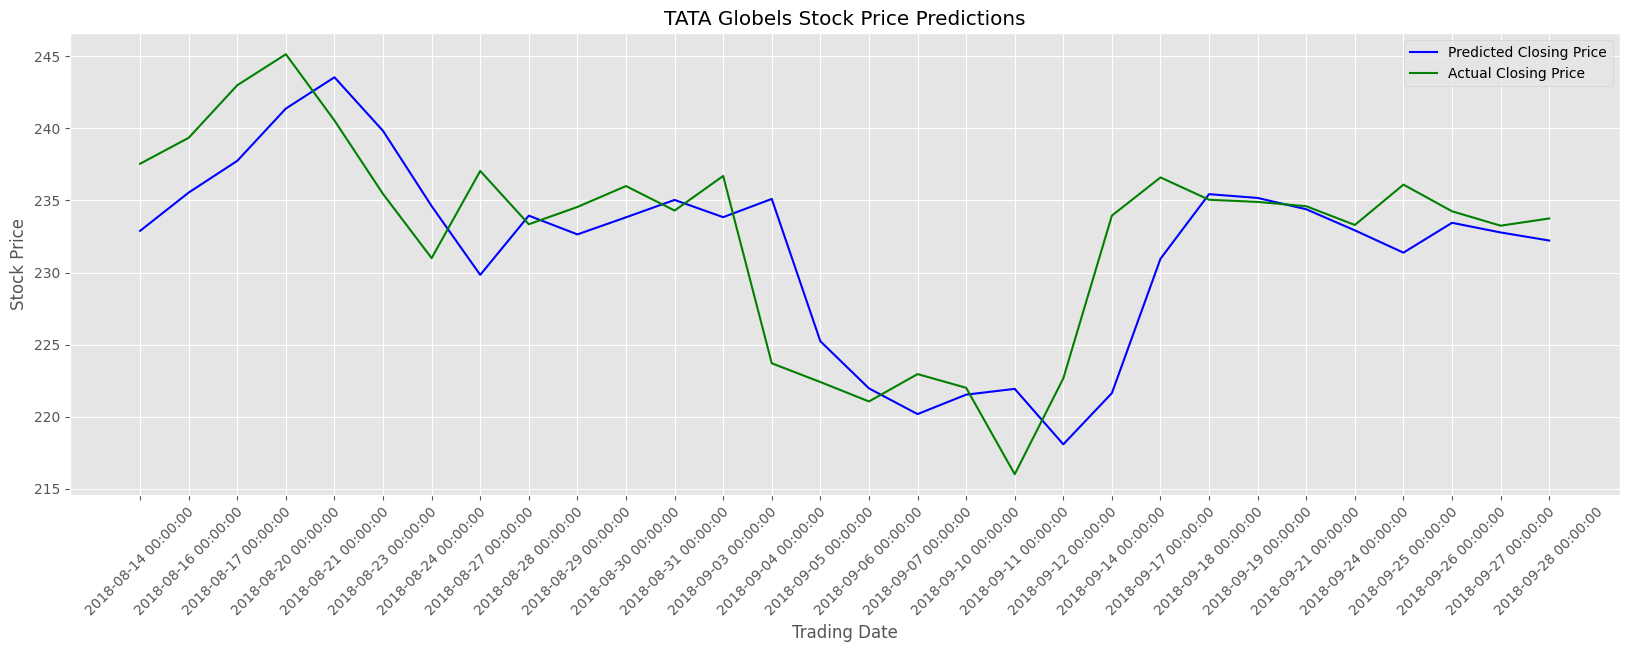

In [55]:
plt.plot(pred, color = 'blue', label = 'Predicted Closing Price')
plt.plot(act, color = 'green', label = 'Actual Closing Price')
 
plt.title('TATA Globels Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(test_rows), data.tail(test_rows).index, rotation=45)
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

### LSTM is best model to predict the TATA Global's Stock Price.